In [1]:
import networkx as nx

In [2]:
# Given an N-node belief network
belief_network = nx.read_graphml("out/2016_2019.graphml")
print("Number of nodes:", belief_network.number_of_nodes())

Number of nodes: 101


In [3]:
# And a random binary belief vector of size N
import numpy as np
belief_vec = np.random.randint(2, size=belief_network.number_of_nodes())

Stress: -4.8683728520582275


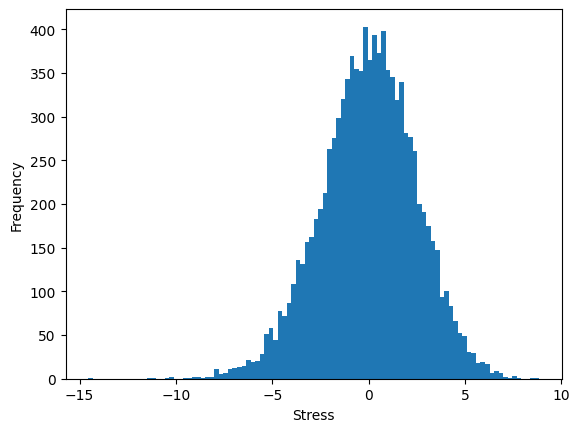

In [45]:
# We calculate the "stress" of the belief vector i as
def stress_slow(belief_vector, interaction_matrix): # Element-wise construction of H (slow)
    H = 0
    num_nodes = len(belief_vector)
    for i in range(num_nodes):
        for j in range(num_nodes):
            H += - interaction_matrix[i, j] * belief_vector[i] * belief_vector[j] 
    return H

def stress(belief_vector, interaction_matrix): # Matrix multiplication H = - (b dot Jb) (fast)
    belief_vector = np.array(belief_vector)
    interaction_matrix = np.array(interaction_matrix)
    H = - np.dot(belief_vector, np.dot(interaction_matrix, belief_vector))
    return H

# Example usage for a random belief vector
belief_vec = np.random.randint(2, size=belief_network.number_of_nodes())
print("Stress:", stress_slow(belief_vec, nx.to_numpy_array(belief_network)))


# Make histogram of K random belief vectors
K = 10000
interaction_matrix = nx.to_numpy_array(belief_network)
count = []
for i in range(K):
    count.append(stress(np.random.randint(3, size=belief_network.number_of_nodes()) - 1, interaction_matrix))

import matplotlib.pyplot as plt
plt.hist(count, bins=100)
plt.xlabel('Stress')
plt.ylabel('Frequency')
plt.show()


In [6]:
# Now we want to calculate the stress of actual belief vectors, instead of random ones.
import pyreadstat as prs
import sys
sys.path.append('../src')
raw_df, meta = prs.read_sas7bdat("data\gss7222_r3.sas7bdat")

from transform_df_to_our_standard import transform_dataframe
original_transformed_df, metadata = transform_dataframe(raw_df)

In [ ]:
variables = ['PARTYID', 'POLVIEWS', 'NATSPAC', 'NATENVIR', 'NATHEAL', 'NATCITY', 'NATCRIME', 'NATDRUG', 'NATEDUC', 'NATRACE', 
             'NATARMS', 'NATAID', 'NATFARE', 'NATROAD', 'NATSOC', 'NATMASS', 'NATPARK', 'NATCHLD', 'NATSCI', 'EQWLTH', 
             'SPKATH', 'COLATH', 'LIBATH', 'SPKRAC', 'COLRAC', 'LIBRAC', 'SPKCOM', 'COLCOM', 'LIBCOM', 'SPKMIL', 'COLMIL', 
             'LIBMIL', 'SPKHOMO', 'COLHOMO', 'LIBHOMO', 'SPKMSLM', 'COLMSLM', 'LIBMSLM', 'CAPPUN', 'GUNLAW', 'COURTS', 
             'GRASS', 'ATTEND', 'RELITEN', 'POSTLIFE', 'PRAYER', 'AFFRMACT', 'WRKWAYUP', 'HELPFUL', 'FAIR', 'TRUST', 
             'CONFINAN', 'CONBUS', 'CONCLERG', 'CONEDUC', 'CONFED', 'CONLABOR', 'CONPRESS', 'CONMEDIC', 'CONTV', 'CONJUDGE', 
             'CONSCI', 'CONLEGIS', 'CONARMY', 'GETAHEAD', 'FEPOL', 'ABDEFECT', 'ABNOMORE', 'ABHLTH', 'ABPOOR', 'ABRAPE', 
             'ABSINGLE', 'ABANY', 'SEXEDUC', 'DIVLAW', 'PREMARSX', 'TEENSEX', 'XMARSEX', 'HOMOSEX', 'PORNLAW', 'SPANKING', 
             'LETDIE1', 'SUICIDE1', 'SUICIDE2', 'POLHITOK', 'POLABUSE', 'POLMURDR', 'POLESCAP', 'POLATTAK', 'NEWS', 'TVHOURS', 
             'FECHLD', 'FEPRESCH', 'FEFAM', 'RACDIF1', 'RACDIF2', 'RACDIF3', 'RACDIF4', 'HELPPOOR', 'PRESLAST_NONCONFORM', 
             'PRESLAST_DEMREP', 'VOTELAST']


# Choose a random row in the df
import random
row = random.choice(range(original_transformed_df.shape[0]))
print("Row:", row)
# Display the row
print(original_transformed_df.iloc[row])

Row: 56200
YEAR                   2012.0
ID                     1114.0
BALLOT                    1.0
PARTYID                   3.0
OTHER_PARTY               0.0
                        ...  
HELPBLK                   NaN
MARHOMO                   NaN
VOTELAST                  0.0
PRESLAST_NONCONFORM       NaN
PRESLAST_DEMREP           NaN
Name: 56200, Length: 350, dtype: float64
